# Predicting Car Prices in the American Market for Strategic Success

## Name:Sijin S

### Overview of Problem Statement:-
A Chinese automobile company plans to enter the US market by setting up local manufacturing to compete with US and European brands. They have contracted an automobile consulting firm to analyze factors influencing car prices in the American market, which may differ from China. Using a large dataset from market surveys, the goal is to identify key variables that affect car pricing and understand their impact. This analysis will guide the company in making informed decisions on product design, pricing strategies, and market positioning for a successful market entry.

### Objective:
To develop the best model for predicting car prices in the American market by analyzing the relationship between independent variables and pricing. The model will identify the most significant factors influencing car prices and assess how well these variables explain price variations.

### Data description:
Source:[https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link]

Feature: car_ID ,symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm,citympg, highwaympg, price

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV

import joblib
import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [3]:
#Importing Data
data = pd.read_csv('CarPrice_Assignment.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df = pd.DataFrame(data)

In [7]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [13]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
df.shape

(205, 26)

In [17]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Data preprocessing and Data cleaning

In [19]:
# Checking for duplicate
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [21]:
df.duplicated().sum()

0

In [23]:
# Checking for null values
df.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [27]:
#Classifying columns
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("numerical columns: ",numerical_columns)
print("Categorical columns: ",categorical_columns)

numerical columns:  Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Categorical columns:  Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


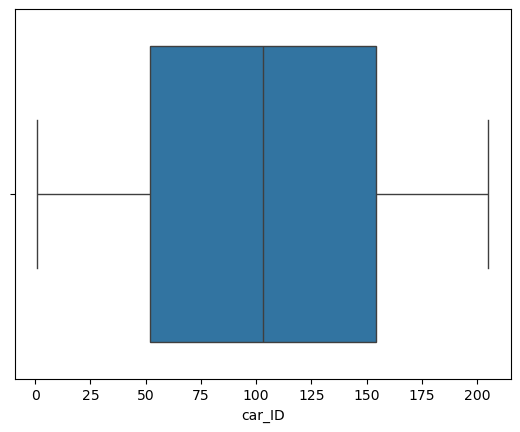

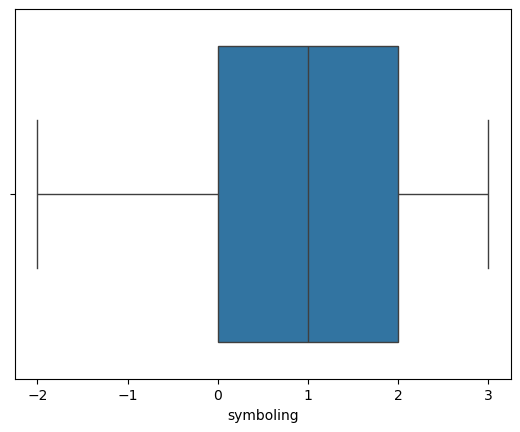

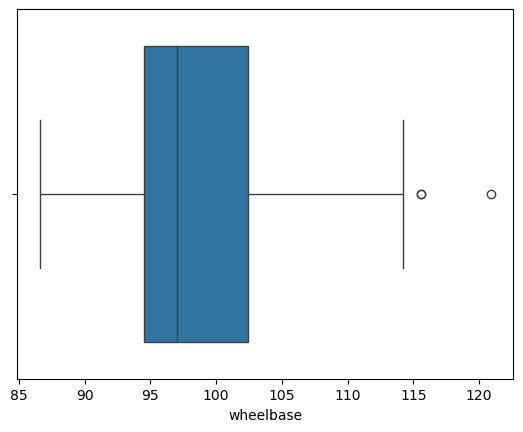

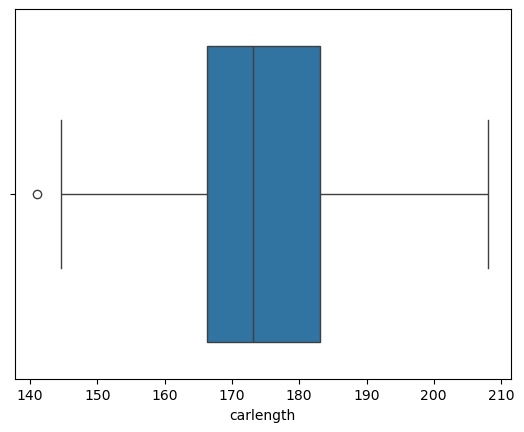

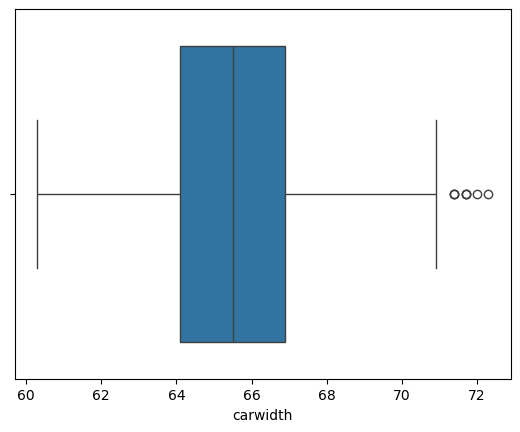

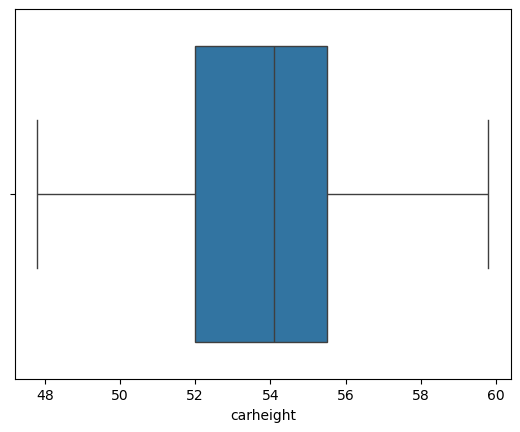

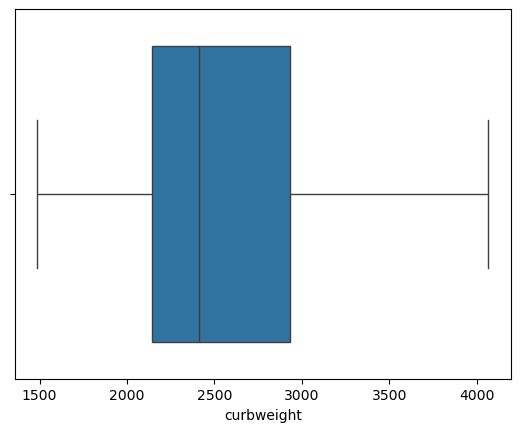

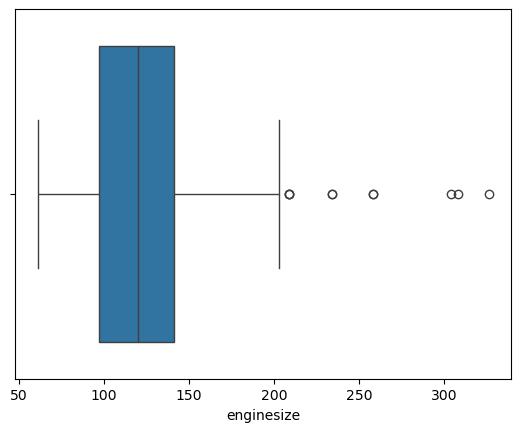

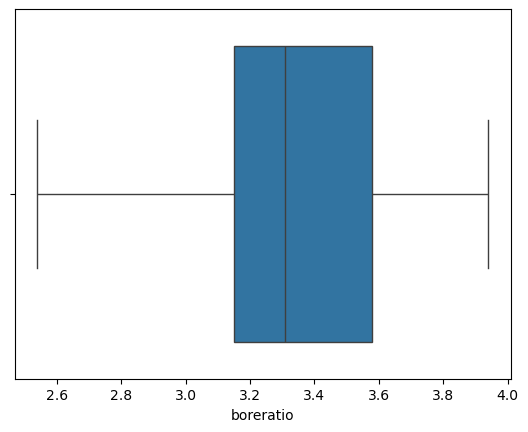

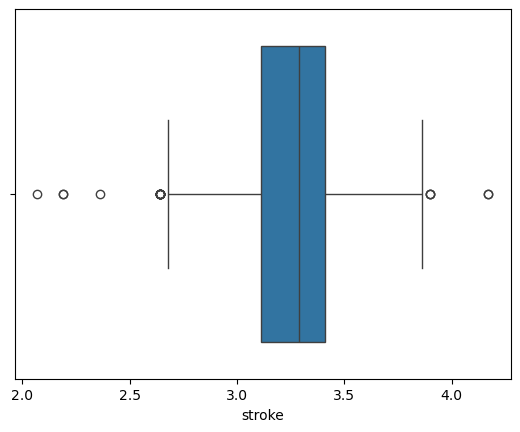

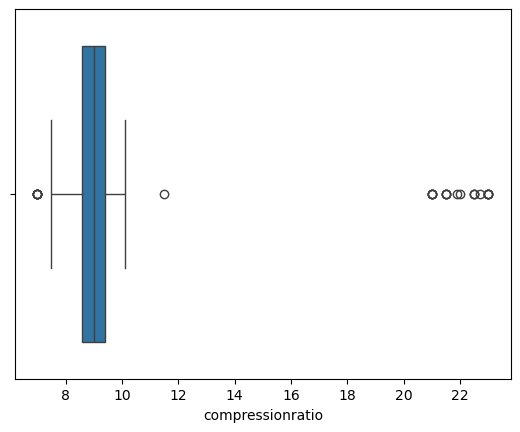

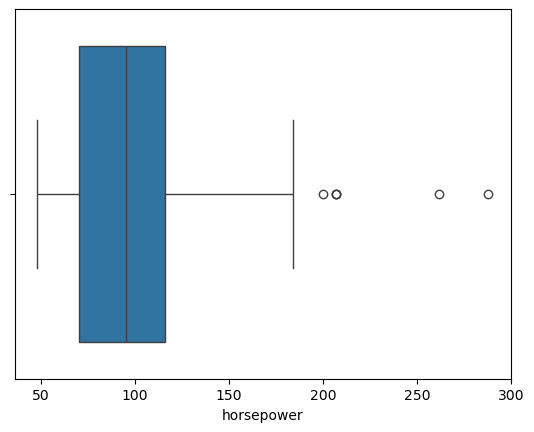

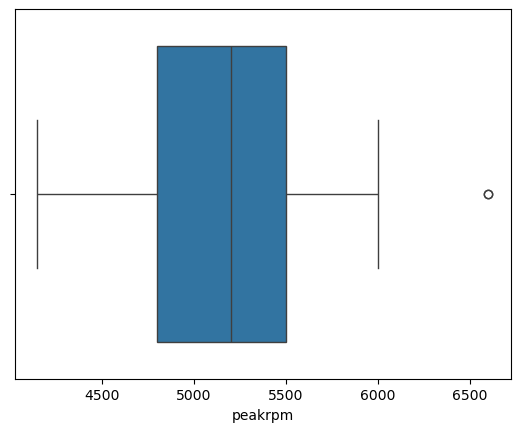

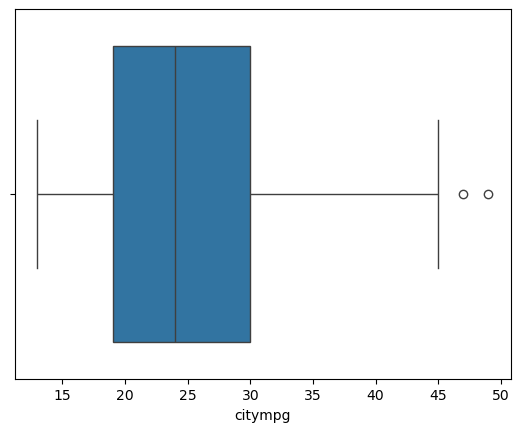

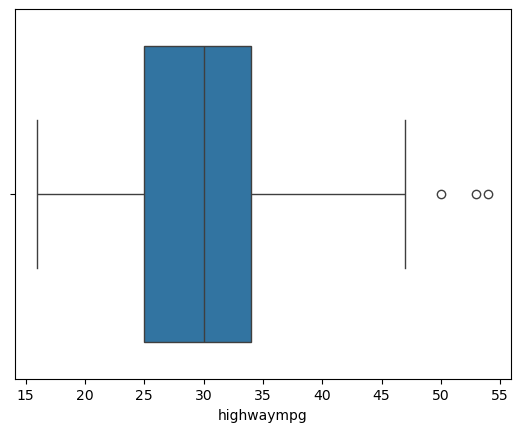

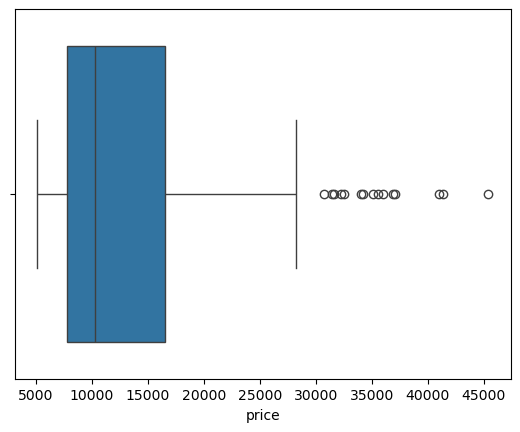

In [29]:
#Outlier Detection
#Boxplot to Identify Outliers
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'car_ID'),
  Text(1, 0, 'symboling'),
  Text(2, 0, 'wheelbase'),
  Text(3, 0, 'carlength'),
  Text(4, 0, 'carwidth'),
  Text(5, 0, 'carheight'),
  Text(6, 0, 'curbweight'),
  Text(7, 0, 'enginesize'),
  Text(8, 0, 'boreratio'),
  Text(9, 0, 'stroke'),
  Text(10, 0, 'compressionratio'),
  Text(11, 0, 'horsepower'),
  Text(12, 0, 'peakrpm'),
  Text(13, 0, 'citympg'),
  Text(14, 0, 'highwaympg'),
  Text(15, 0, 'price')])

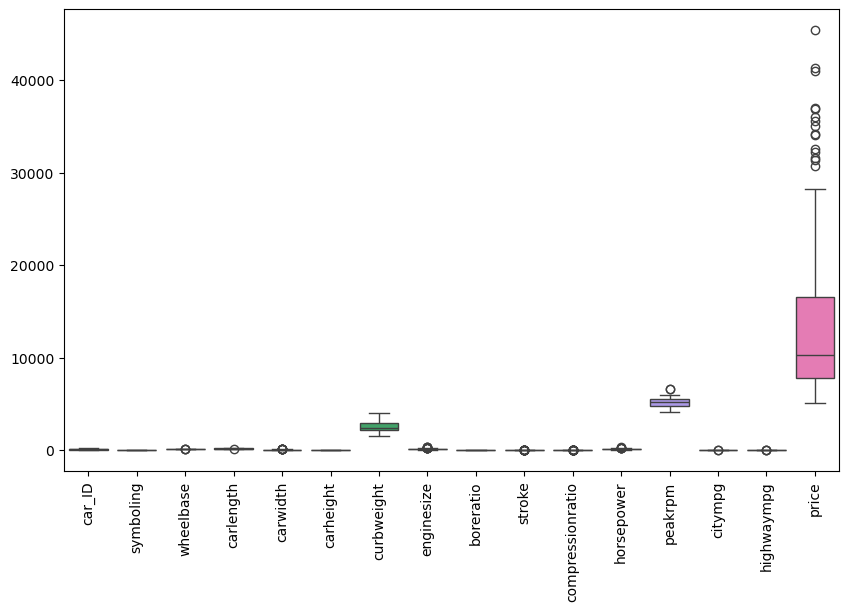

In [31]:
numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10,6))
sns.boxplot(data = df[numerical_columns])
plt.xticks(rotation=90)

In [33]:
#IQR Method
# List of features with potential outliers
features = ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'stroke', 
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Function to apply IQR method to fix outliers
def fix_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the respective bounds
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    
    return df

df = fix_outliers_iqr(df, features)

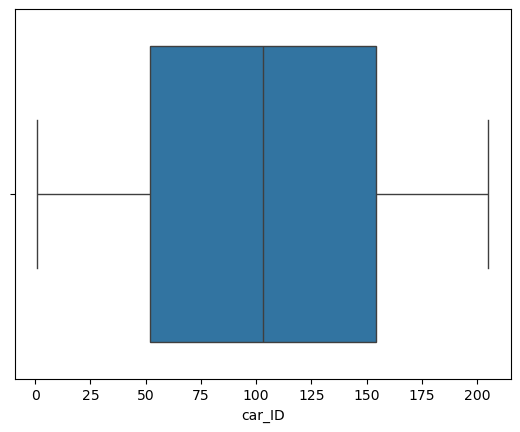

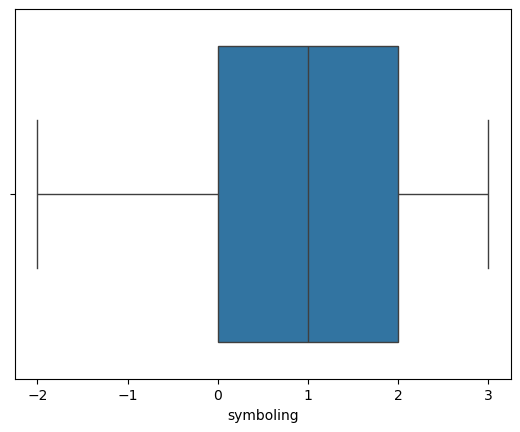

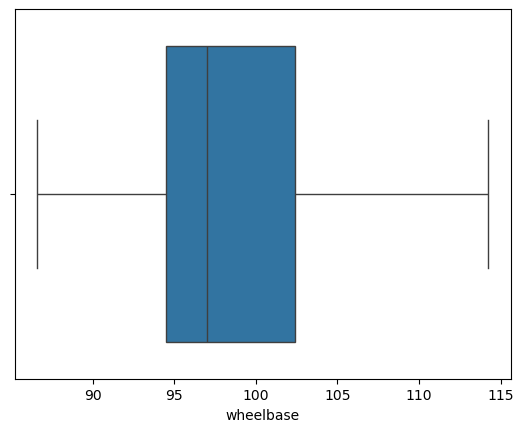

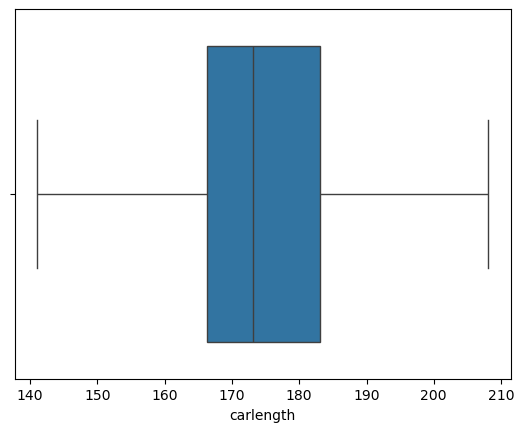

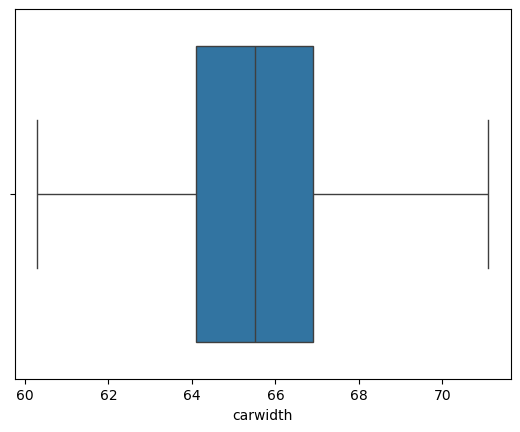

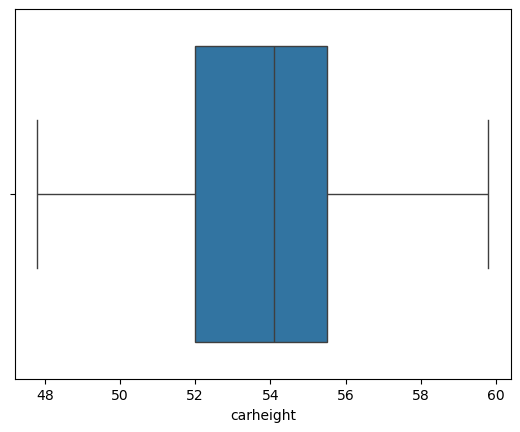

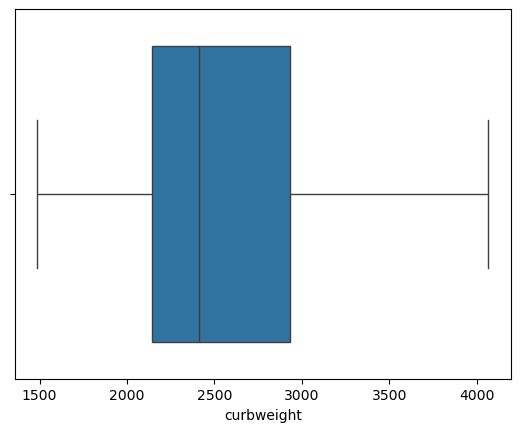

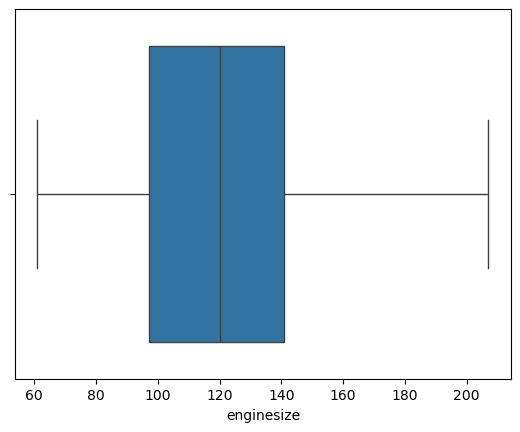

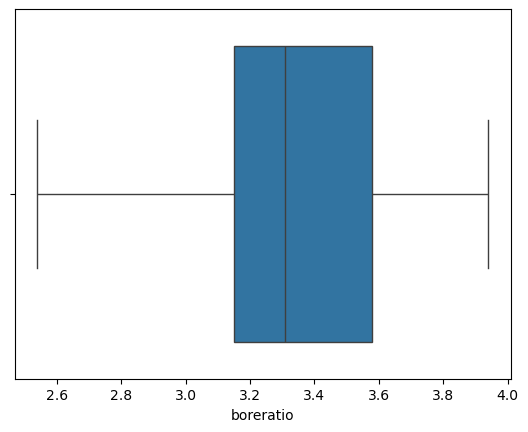

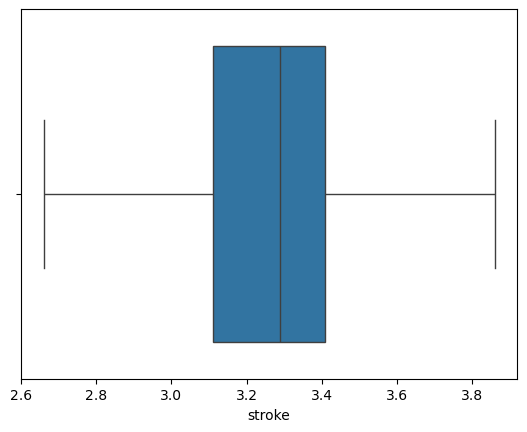

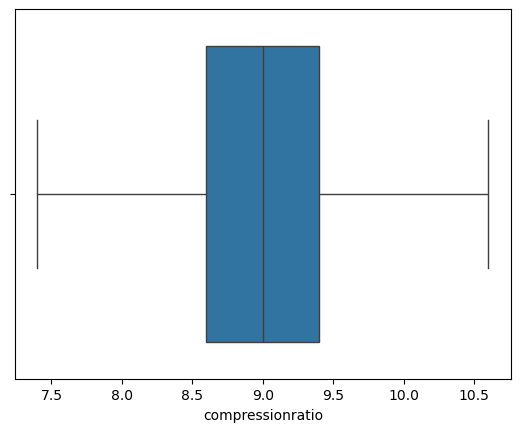

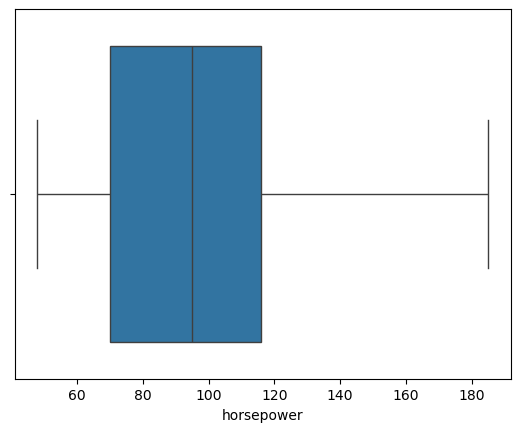

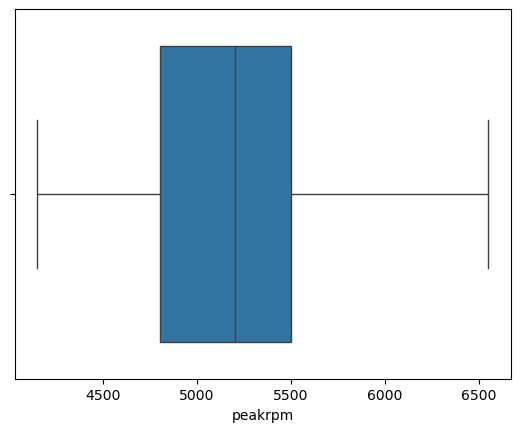

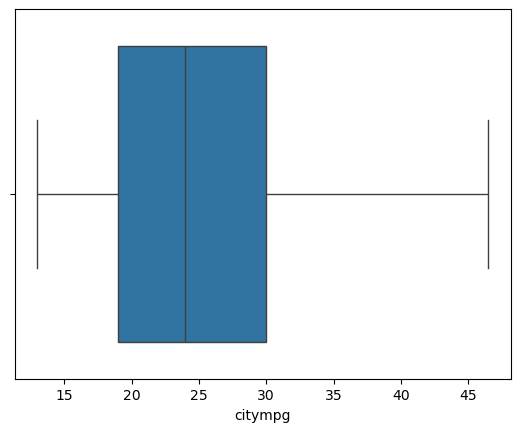

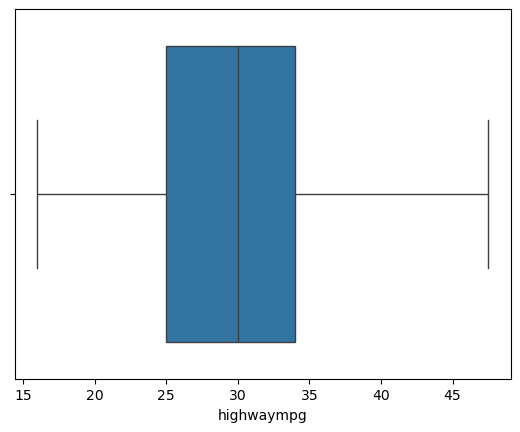

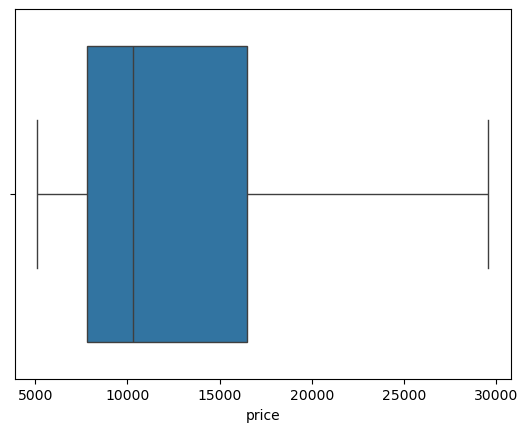

In [35]:
#Visualizing after Outlier detection
#boxplot to identify outliers
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'car_ID'),
  Text(1, 0, 'symboling'),
  Text(2, 0, 'wheelbase'),
  Text(3, 0, 'carlength'),
  Text(4, 0, 'carwidth'),
  Text(5, 0, 'carheight'),
  Text(6, 0, 'curbweight'),
  Text(7, 0, 'enginesize'),
  Text(8, 0, 'boreratio'),
  Text(9, 0, 'stroke'),
  Text(10, 0, 'compressionratio'),
  Text(11, 0, 'horsepower'),
  Text(12, 0, 'peakrpm'),
  Text(13, 0, 'citympg'),
  Text(14, 0, 'highwaympg'),
  Text(15, 0, 'price')])

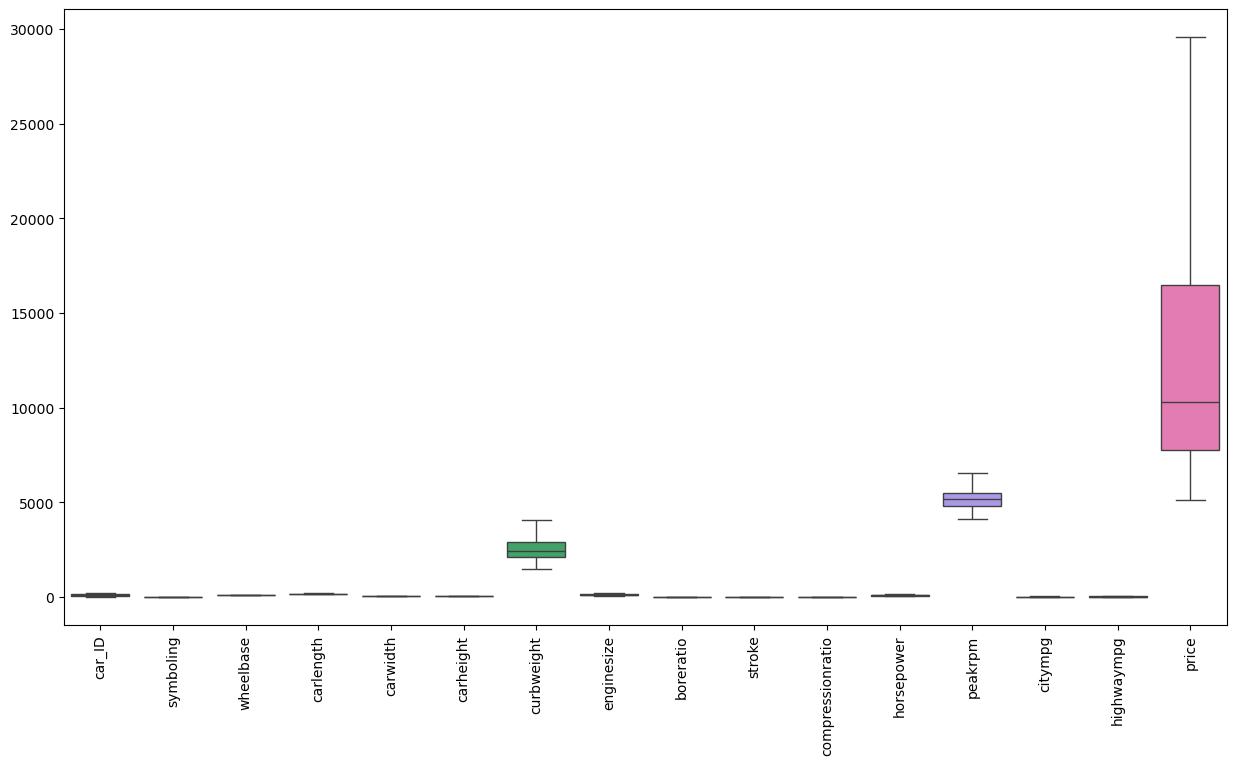

In [37]:
numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15,8))
sns.boxplot(data = df[numerical_columns])
plt.xticks(rotation=90)

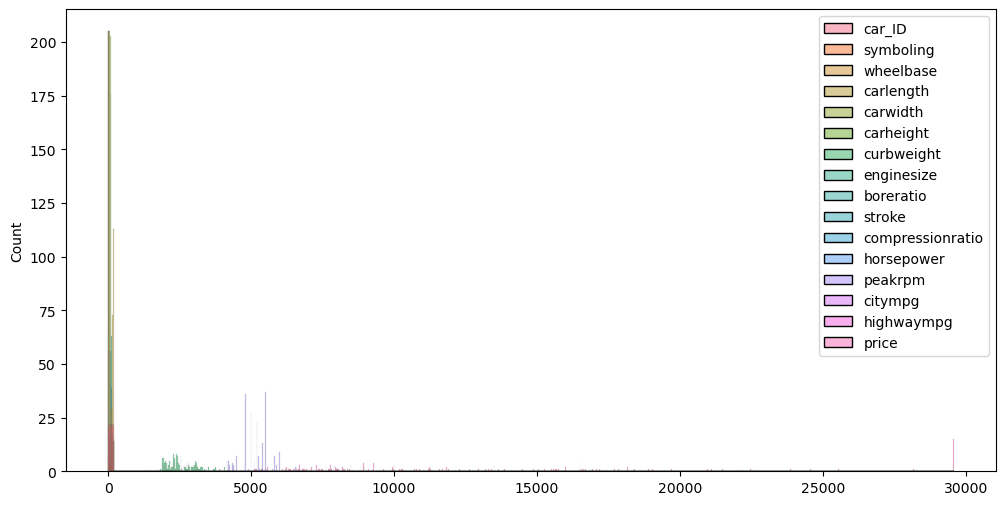

In [41]:
#Checking Skew
#visualizing
plt.figure(figsize=(12,6))
sns.histplot(df[numerical_columns])
plt.show()

In [43]:
df[numerical_columns].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           0.924916
carlength           0.155954
carwidth            0.776278
carheight           0.063123
curbweight          0.681398
enginesize          0.908453
boreratio           0.020156
stroke             -0.379130
compressionratio    0.035149
horsepower          0.814957
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               1.222031
dtype: float64

<Axes: xlabel='price', ylabel='Density'>

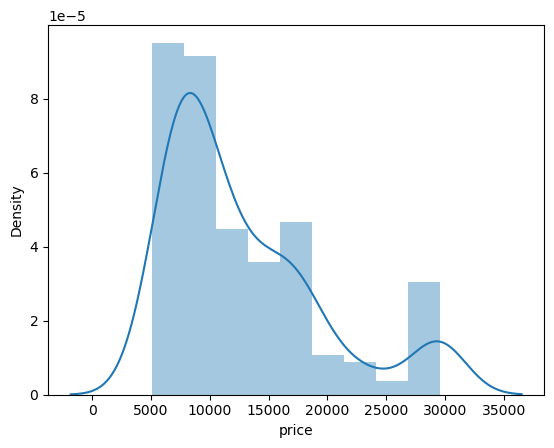

In [45]:
sns.distplot(df['price'])

The'price' variable exhibits a high level of skewness.

### Fixing Skewness Using Log Transformation

In [47]:
df['price'] = np.log(df['price'])
df['wheelbase'] = np.log(df['wheelbase'])
df['carwidth'] = np.log(df['carwidth'])
df['enginesize'] = np.log(df['enginesize'])
df['compressionratio'] = np.log(df['compressionratio'])
df['horsepower'] = np.log(df['horsepower'])

In [49]:
df[numerical_columns].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           0.781960
carlength           0.155954
carwidth            0.696287
carheight           0.063123
curbweight          0.681398
enginesize          0.401418
boreratio           0.020156
stroke             -0.379130
compressionratio   -0.241483
horsepower          0.287093
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               0.459254
dtype: float64

In [51]:
df['compressionratio'] = np.sqrt(df['compressionratio'])
df['wheelbase'] = np.sqrt(df['wheelbase'])

In [53]:
df[numerical_columns].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           0.766142
carlength           0.155954
carwidth            0.696287
carheight           0.063123
curbweight          0.681398
enginesize          0.401418
boreratio           0.020156
stroke             -0.379130
compressionratio   -0.304199
horsepower          0.287093
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               0.459254
dtype: float64

<Axes: xlabel='price', ylabel='Density'>

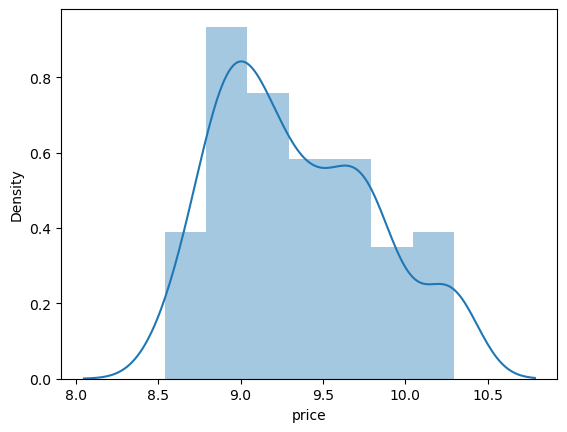

In [55]:
sns.distplot(df['price'])

In [57]:
df[numerical_columns].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           0.766142
carlength           0.155954
carwidth            0.696287
carheight           0.063123
curbweight          0.681398
enginesize          0.401418
boreratio           0.020156
stroke             -0.379130
compressionratio   -0.304199
horsepower          0.287093
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               0.459254
dtype: float64

### Exploratory Data Analysis(EDA)

In [59]:
df1 = df.copy()

In [61]:
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,2.117577,...,4.867534,mpfi,3.47,2.68,1.482304,4.709530,5000.0,21.0,27.0,9.510075
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,2.117577,...,4.867534,mpfi,3.47,2.68,1.482304,4.709530,5000.0,21.0,27.0,9.711116
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,2.132745,...,5.023881,mpfi,2.68,3.47,1.482304,5.036953,5000.0,19.0,26.0,9.711116
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,2.145500,...,4.691348,mpfi,3.19,3.40,1.517427,4.624973,5500.0,24.0,30.0,9.543235
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,2.144563,...,4.912655,mpfi,3.19,3.40,1.442027,4.744932,5500.0,18.0,22.0,9.767095


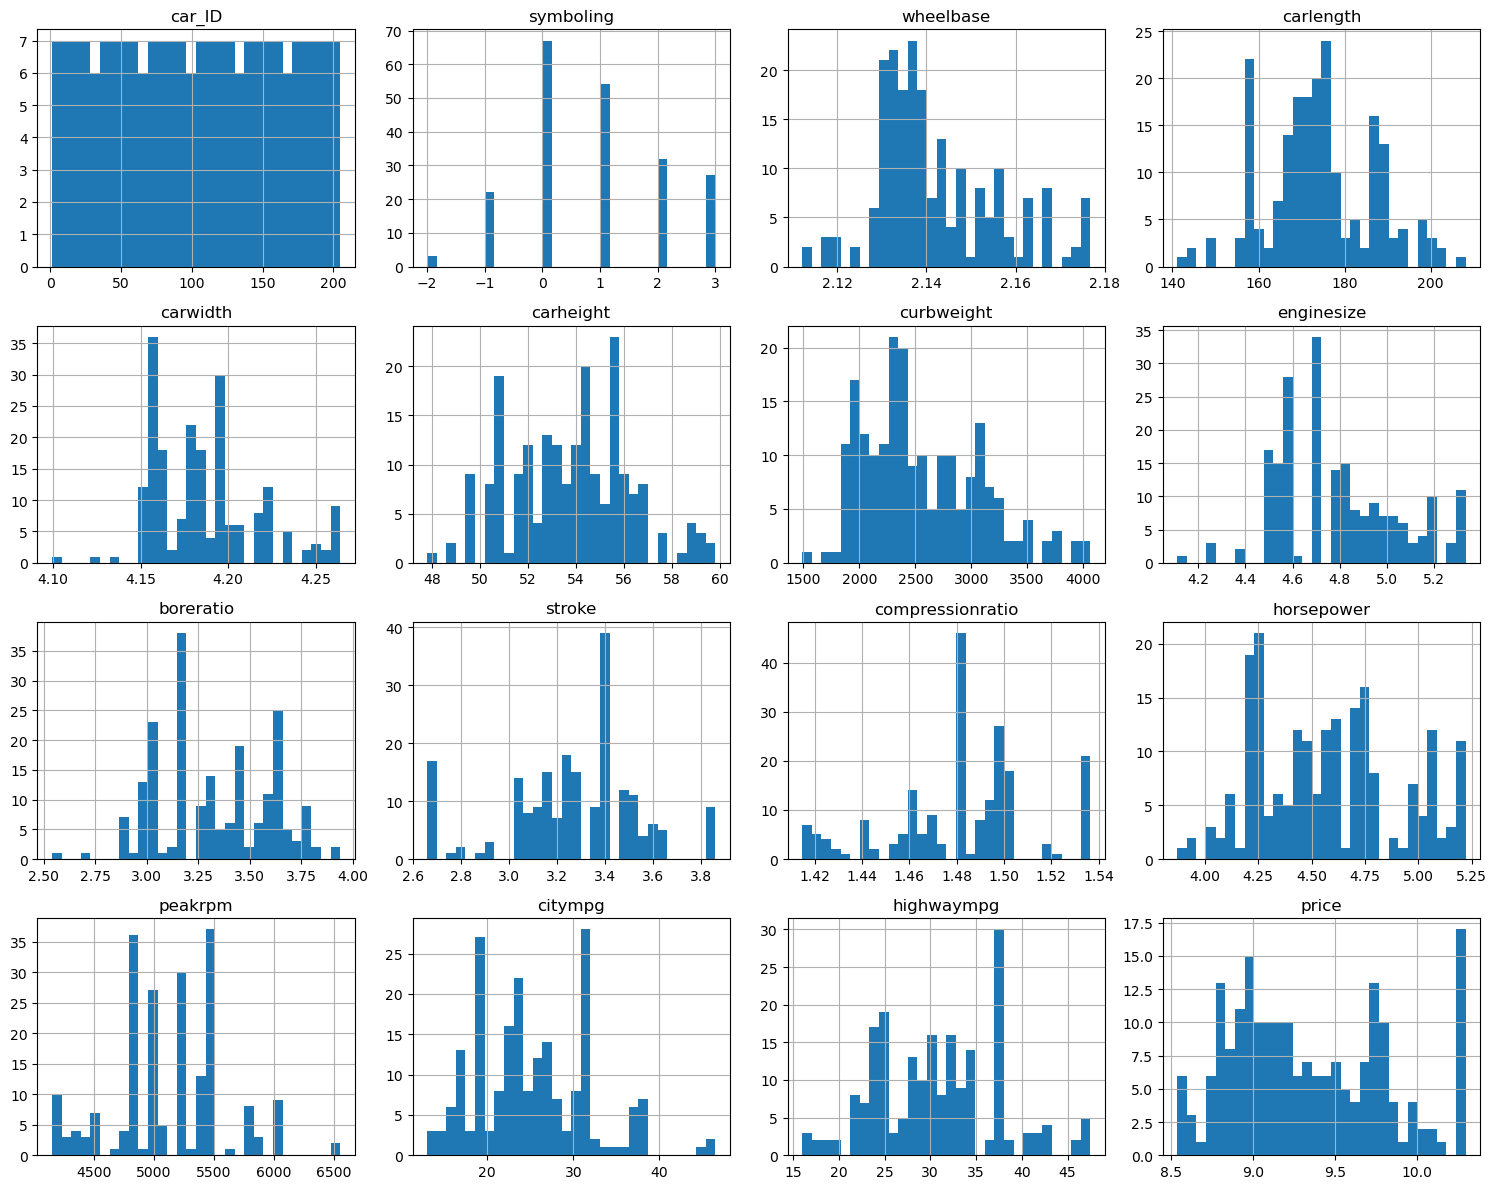

In [63]:
# Histogram
df1.hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

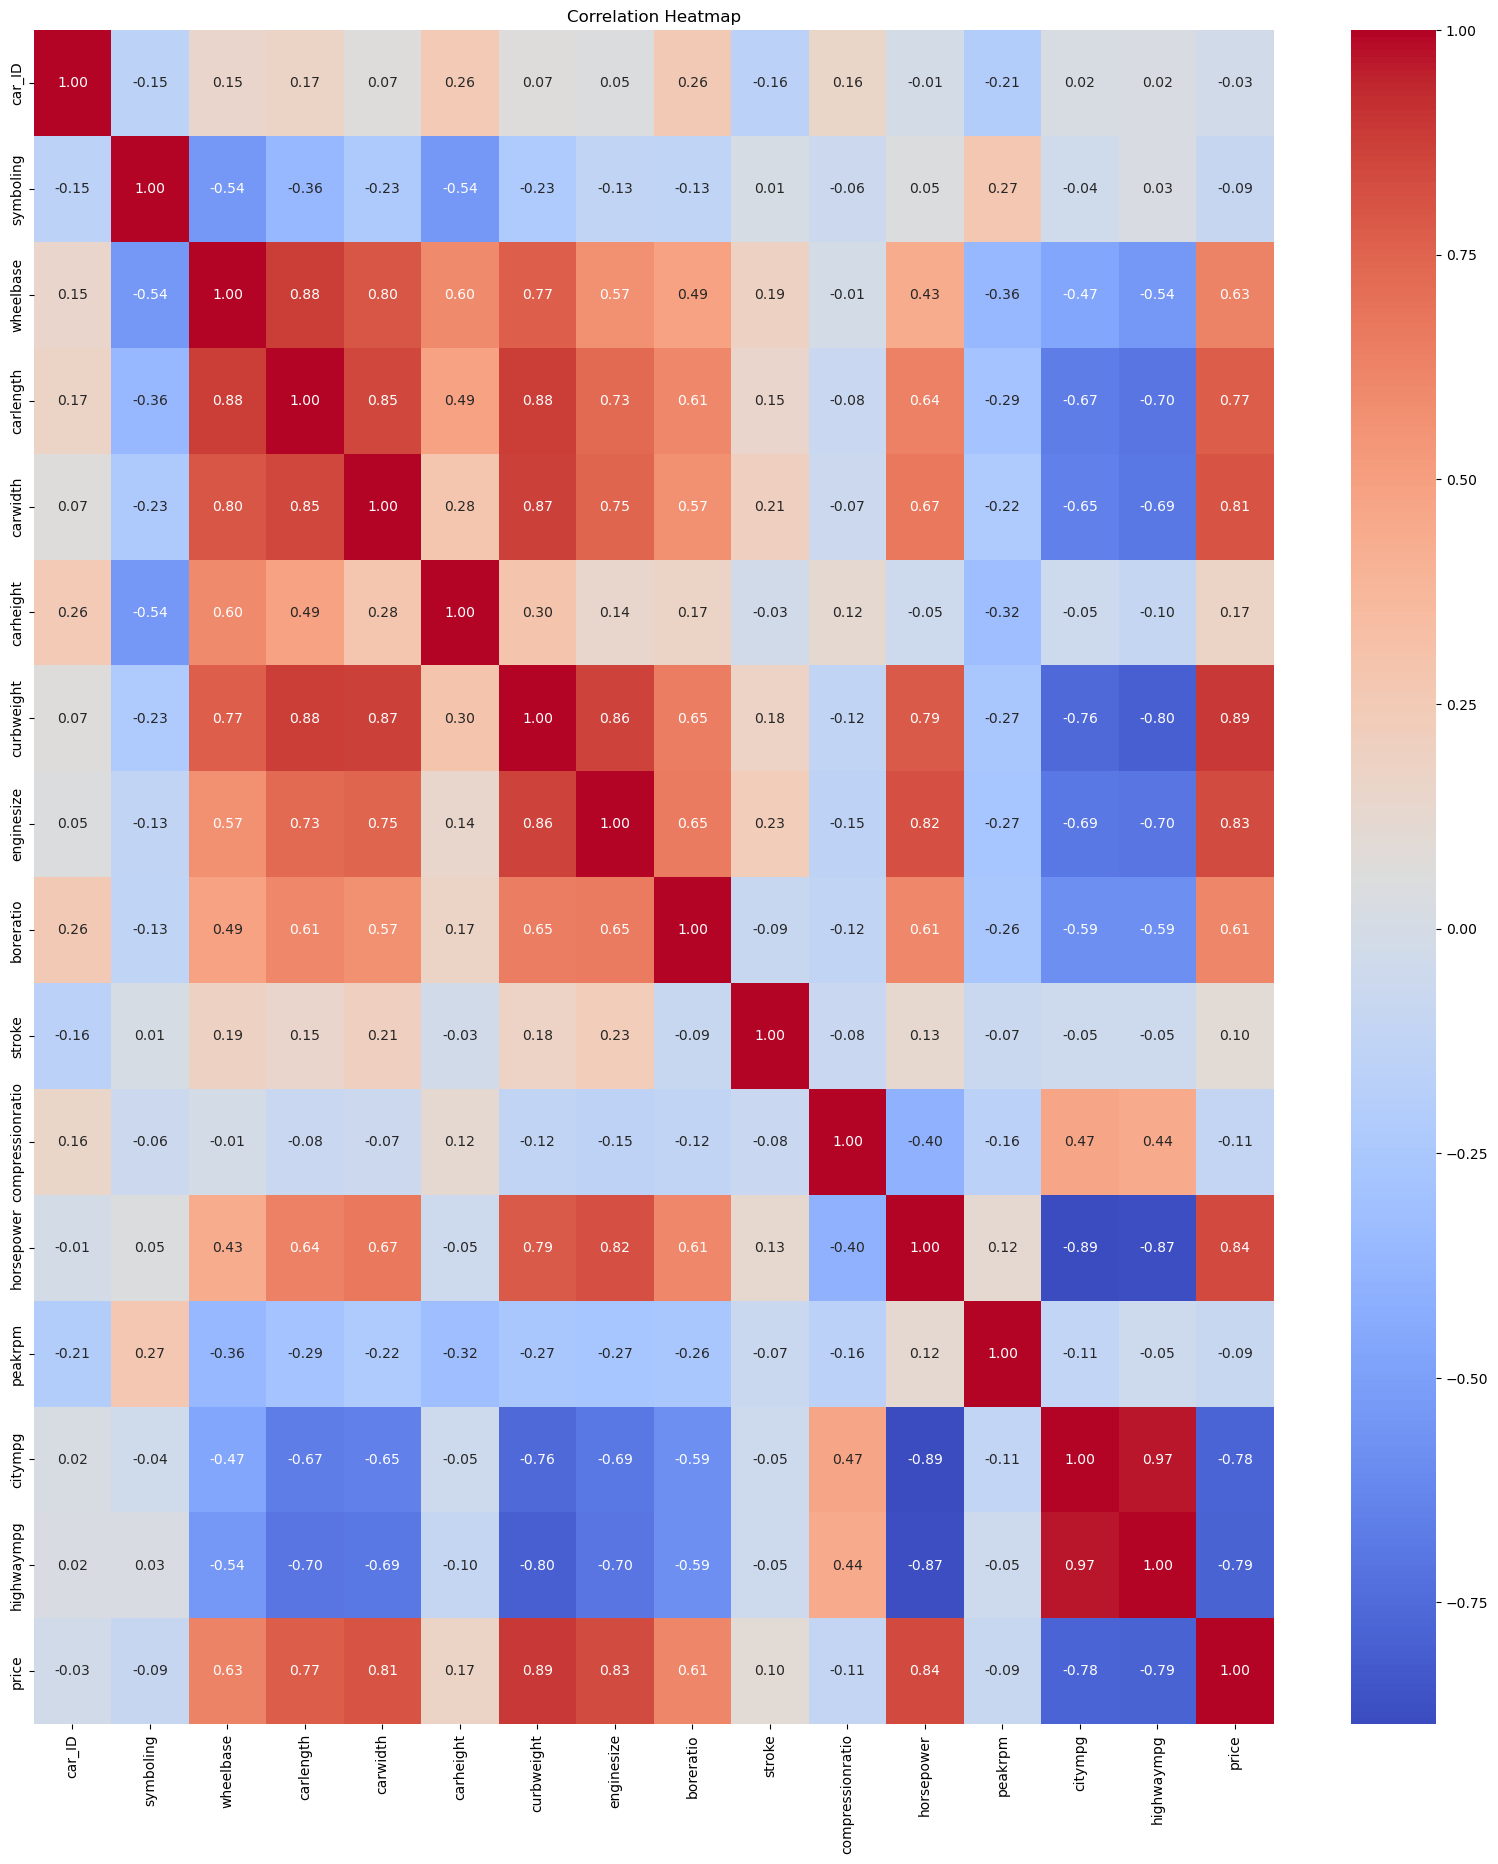

In [65]:
#Compute correlation matrix
corr_matrix = df1[numerical_columns].corr()
# Heatmap
plt.figure(figsize=(20, 22))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

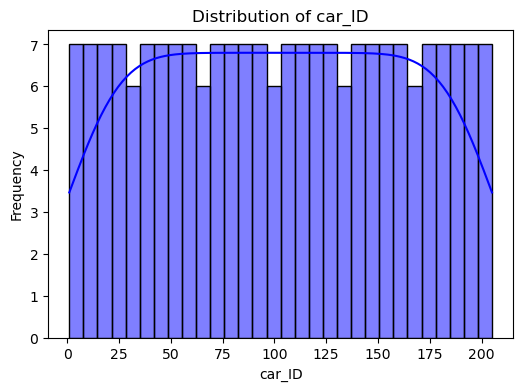

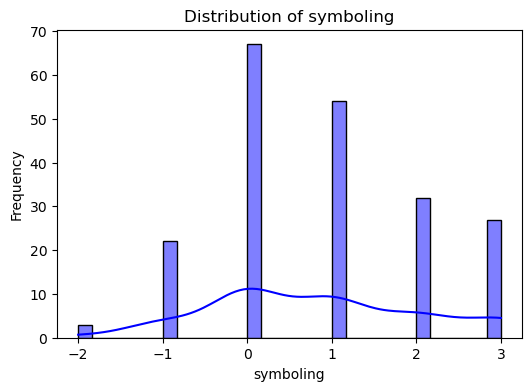

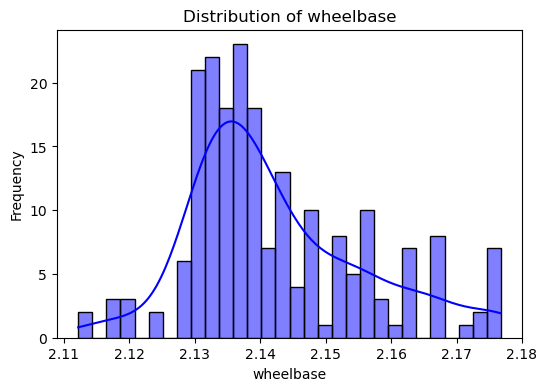

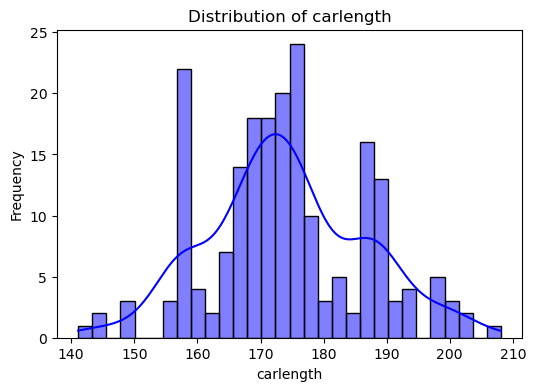

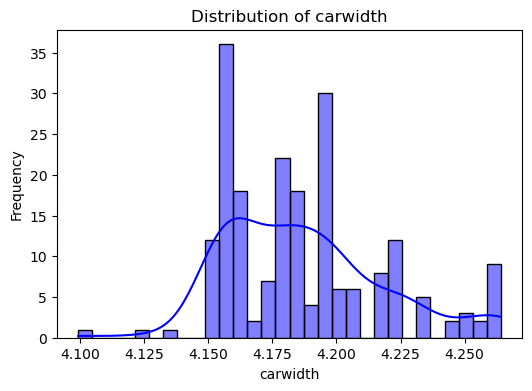

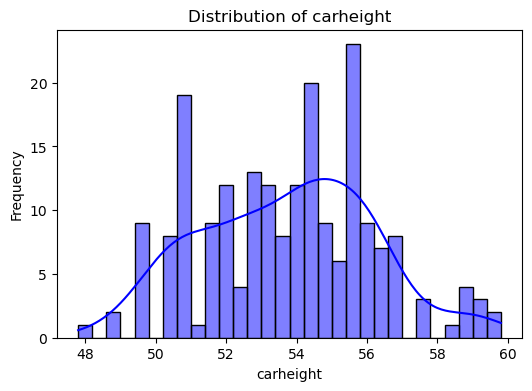

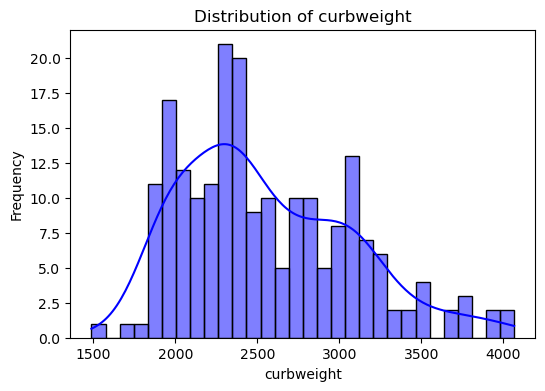

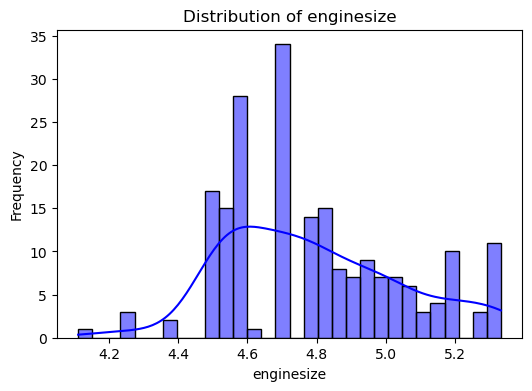

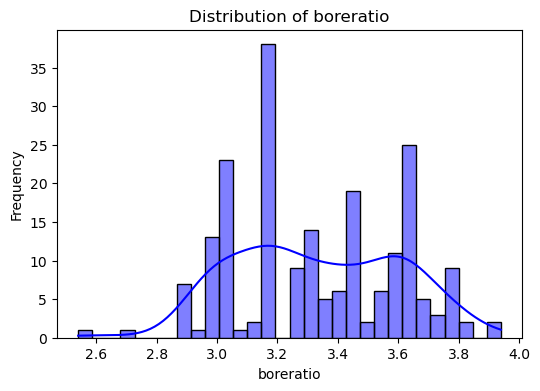

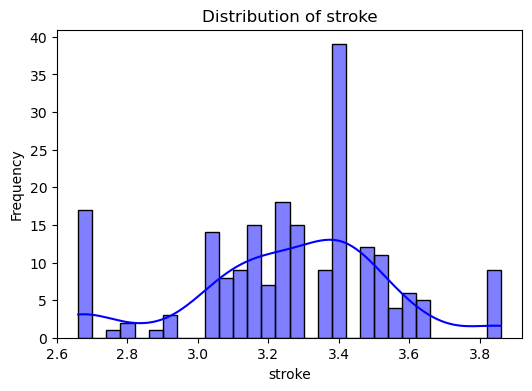

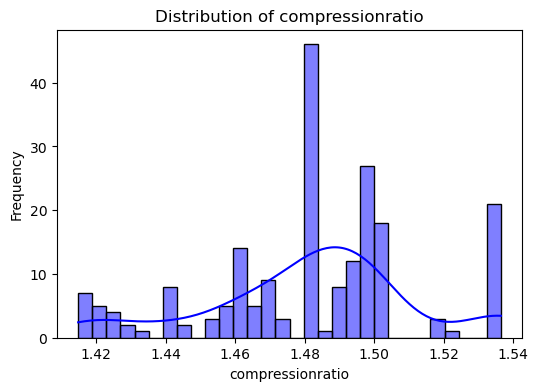

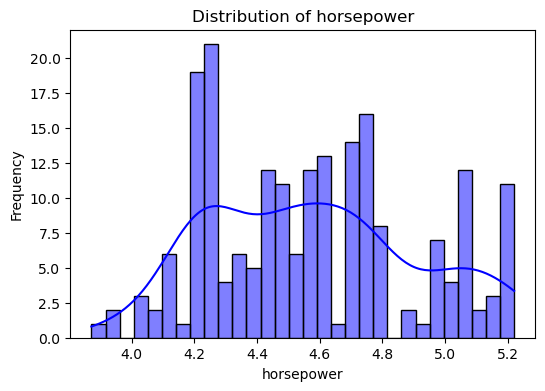

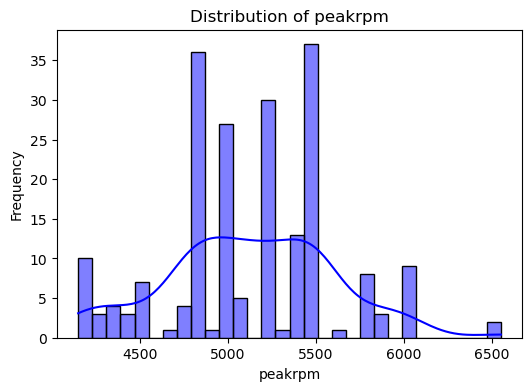

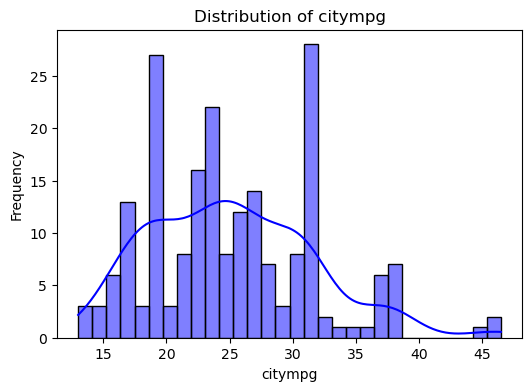

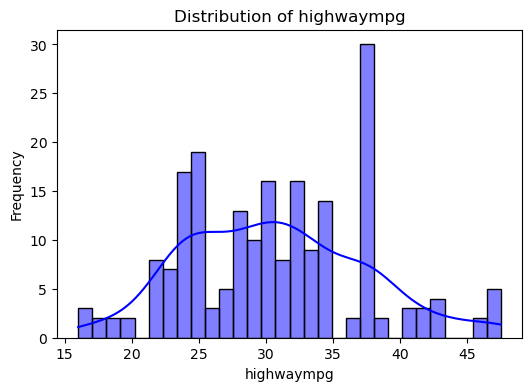

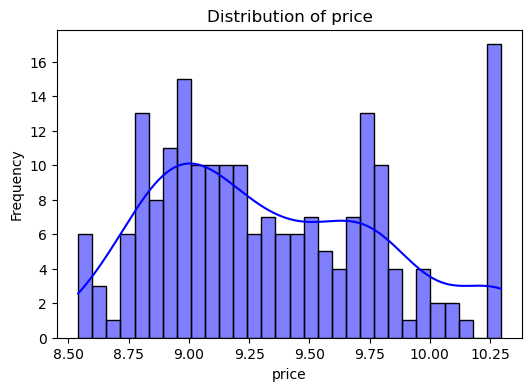

In [67]:
#Plot distribution for numerical column
for feature in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df1[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

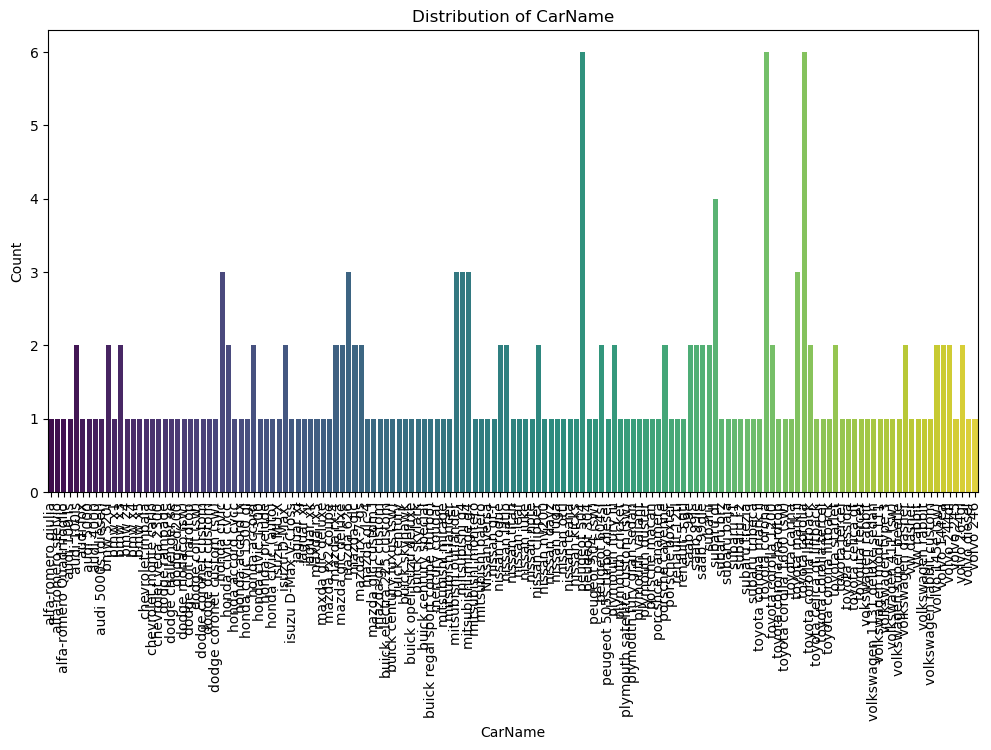

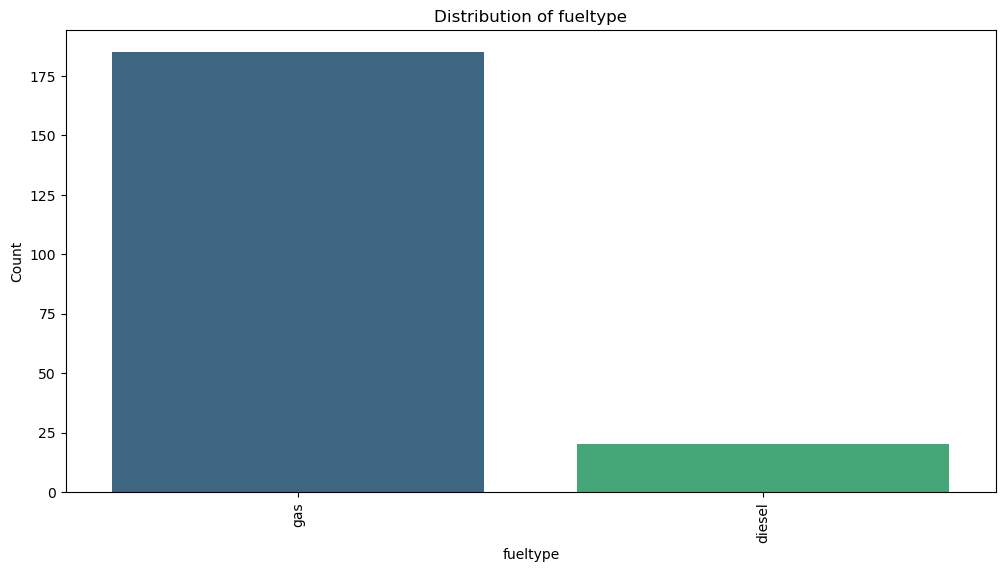

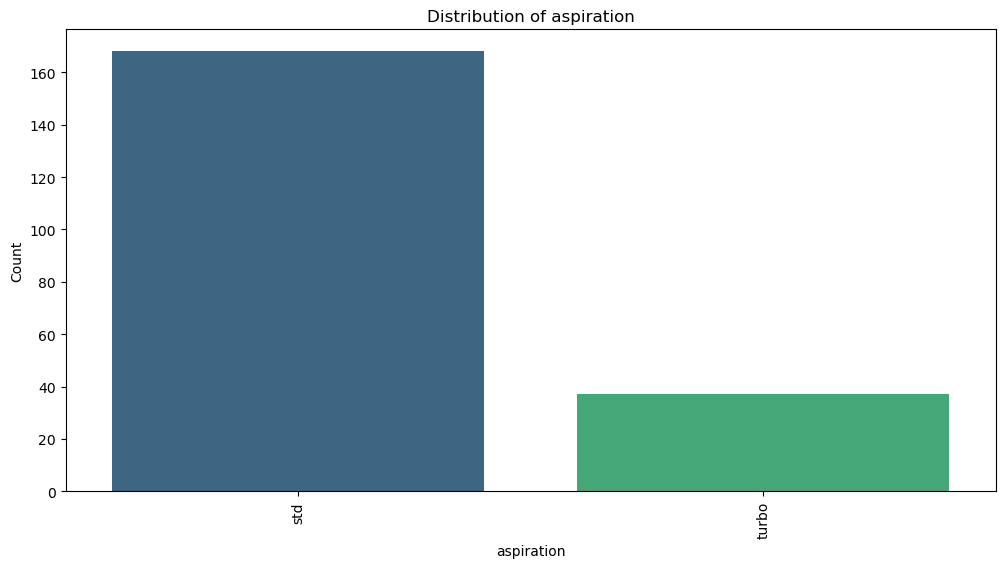

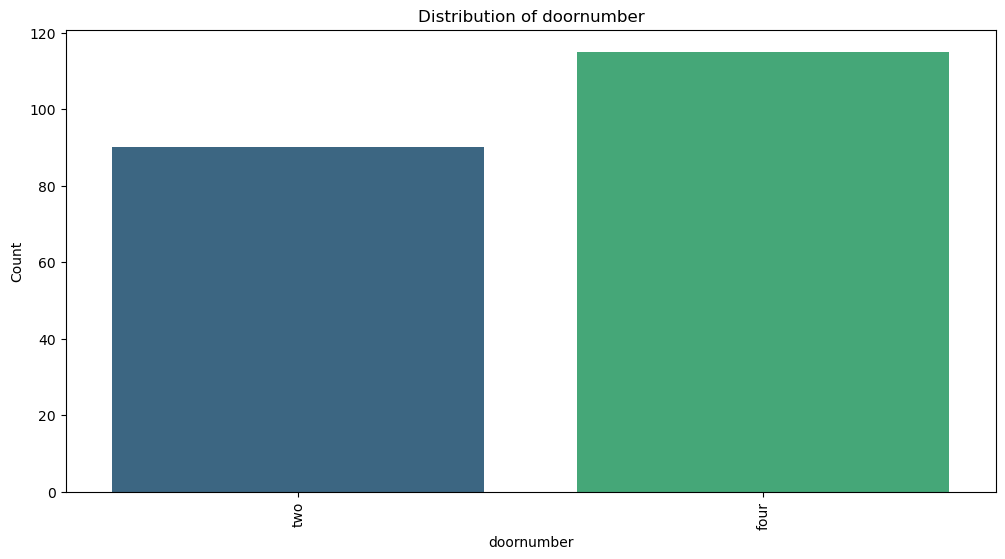

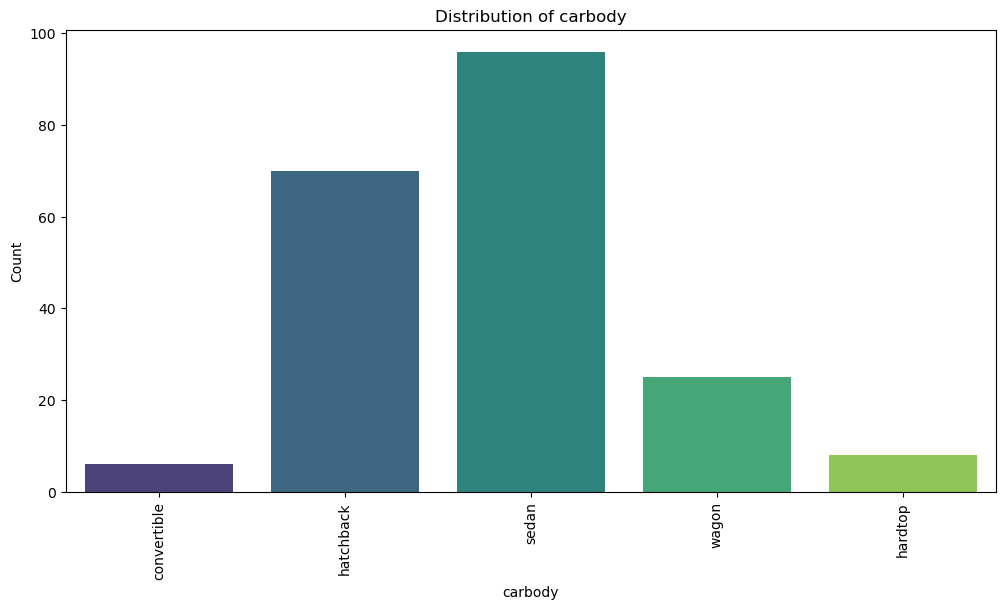

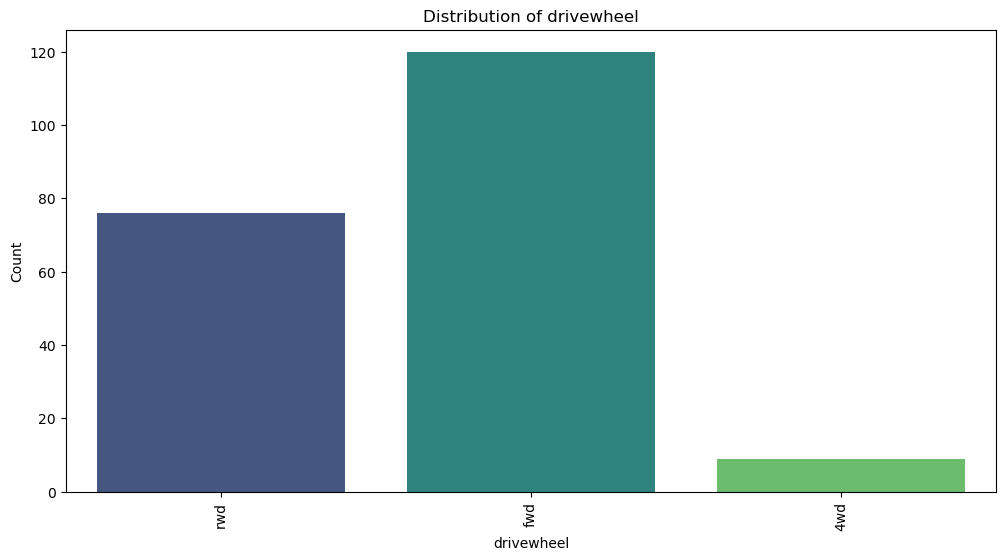

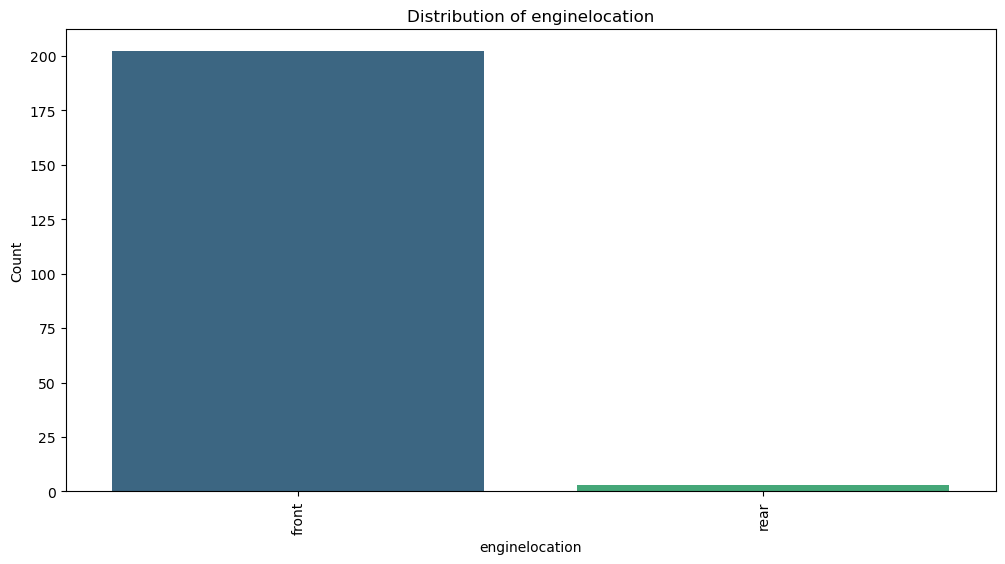

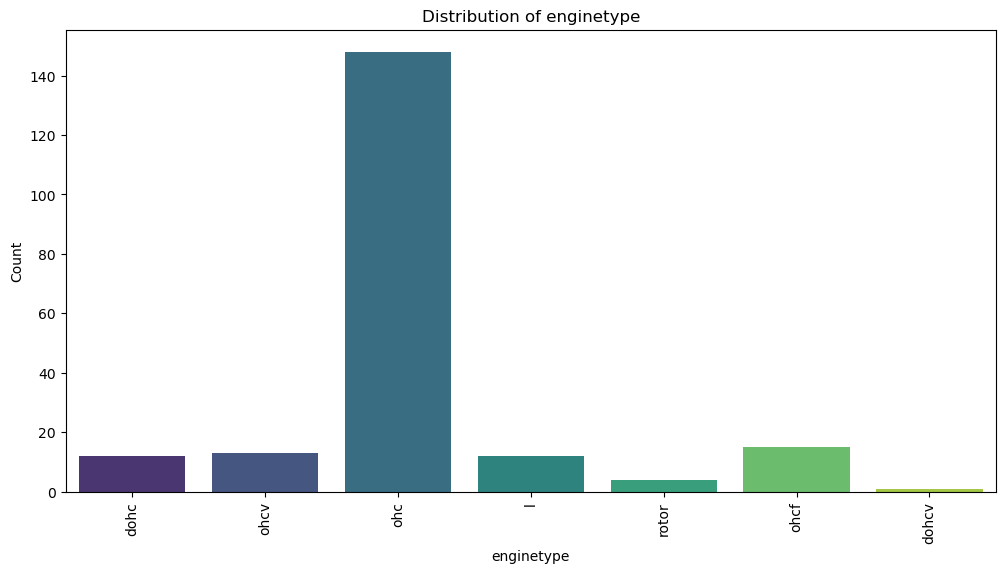

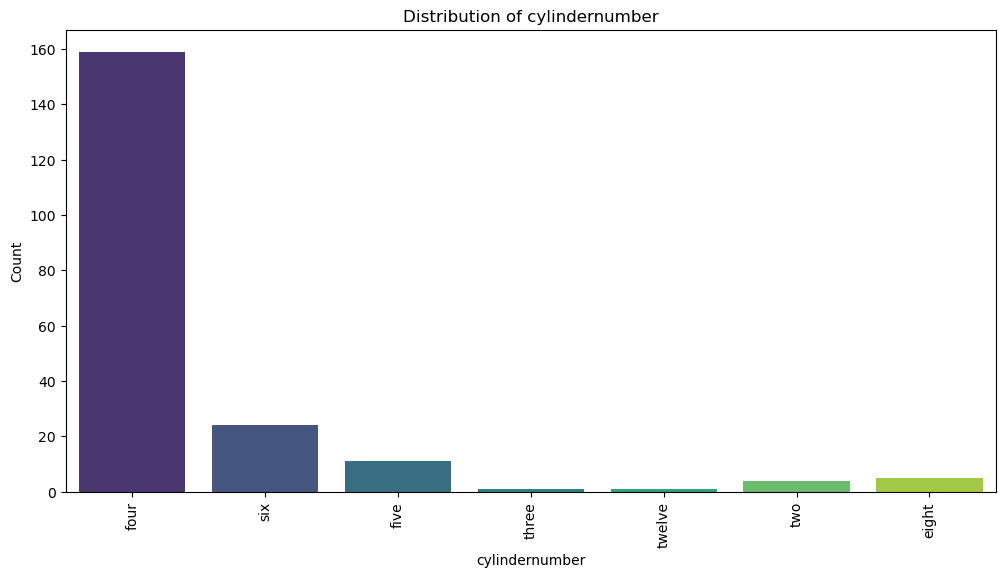

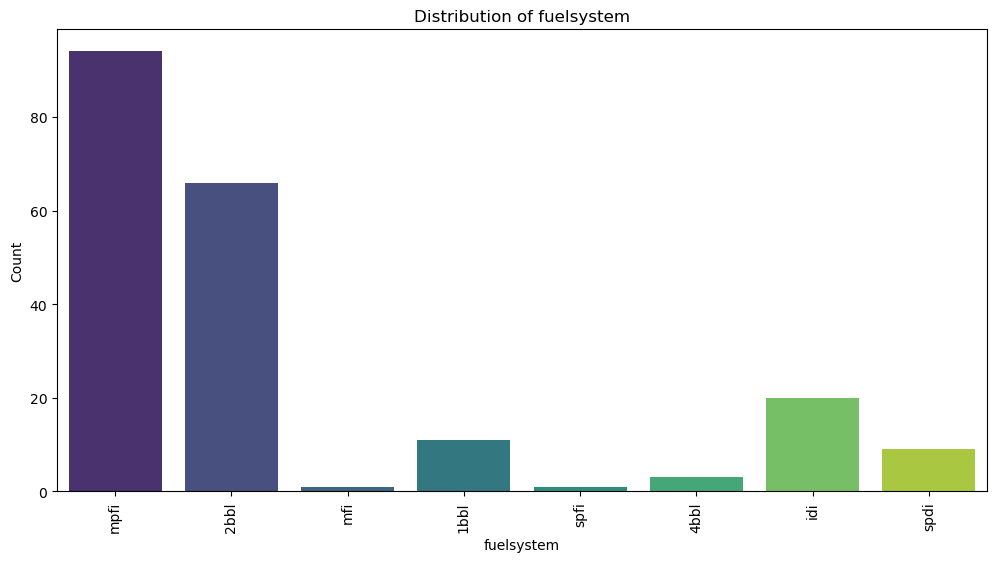

In [69]:
categorical_feature = df1.drop(numerical_columns, axis=1)

# Plot bar chart for each categorical feature
for feature in categorical_feature:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

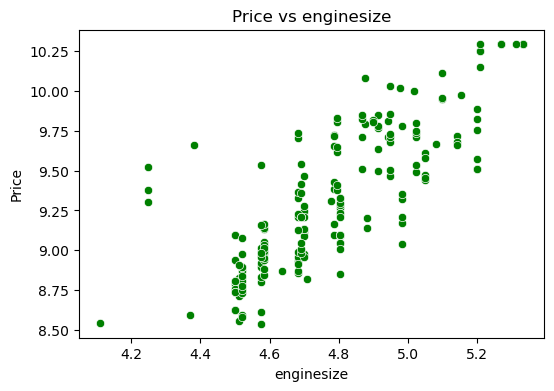

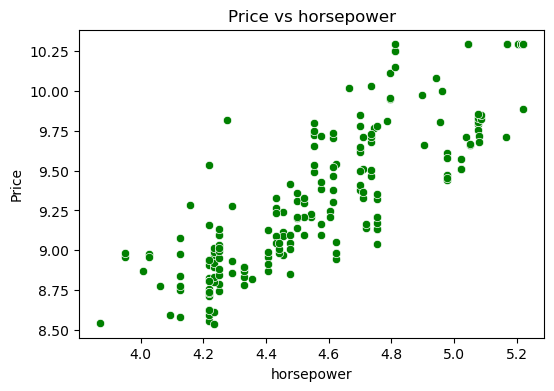

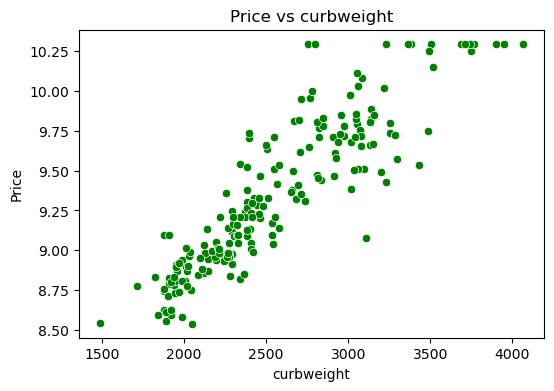

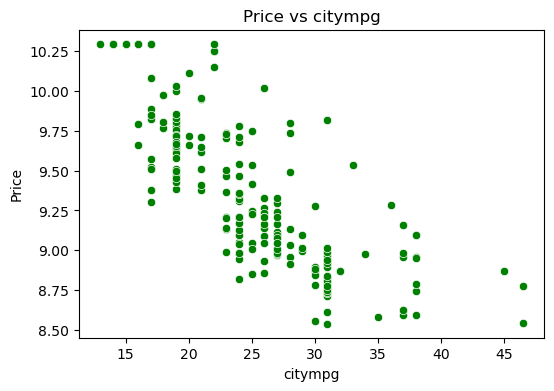

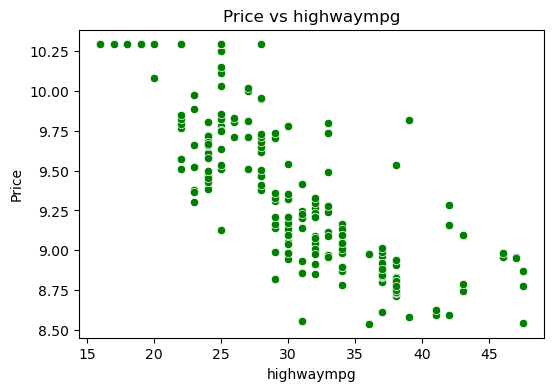

In [71]:
# Scatter plots for price vs numerical features
features_to_compare = ['enginesize', 'horsepower', 'curbweight', 'citympg', 'highwaympg']

for feature in features_to_compare:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['price'], color='green')
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

### Feature Engineering
Onehot Encoding & Label encoding 

In [73]:
label_encoder = LabelEncoder()
df_label = df1.copy()
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,2.117577,...,4.867534,mpfi,3.47,2.68,1.482304,4.709530,5000.0,21.0,27.0,9.510075
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,2.117577,...,4.867534,mpfi,3.47,2.68,1.482304,4.709530,5000.0,21.0,27.0,9.711116
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,2.132745,...,5.023881,mpfi,2.68,3.47,1.482304,5.036953,5000.0,19.0,26.0,9.711116
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,2.145500,...,4.691348,mpfi,3.19,3.40,1.517427,4.624973,5500.0,24.0,30.0,9.543235
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,2.144563,...,4.912655,mpfi,3.19,3.40,1.442027,4.744932,5500.0,18.0,22.0,9.767095


In [77]:
#label Encoding
df_label['fueltype'] = label_encoder.fit_transform(df1['fueltype'])
df_label['aspiration'] = label_encoder.fit_transform(df1['aspiration'])
df_label['doornumber'] = label_encoder.fit_transform(df1['doornumber'])
df_label['carbody'] = label_encoder.fit_transform(df1['carbody'])
df_label['drivewheel'] = label_encoder.fit_transform(df1['drivewheel'])
df_label['enginelocation'] = label_encoder.fit_transform(df1['enginelocation'])
df_label['enginetype'] = label_encoder.fit_transform(df1['enginetype'])
df_label['cylindernumber'] = label_encoder.fit_transform(df1['cylindernumber'])
df_label['fuelsystem'] = label_encoder.fit_transform(df1['fuelsystem'])
df_label.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,2.117577,...,4.867534,5,3.47,2.68,1.482304,4.709530,5000.0,21.0,27.0,9.510075
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,2.117577,...,4.867534,5,3.47,2.68,1.482304,4.709530,5000.0,21.0,27.0,9.711116
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,2.132745,...,5.023881,5,2.68,3.47,1.482304,5.036953,5000.0,19.0,26.0,9.711116
3,4,2,audi 100 ls,1,0,0,3,1,0,2.145500,...,4.691348,5,3.19,3.40,1.517427,4.624973,5500.0,24.0,30.0,9.543235
4,5,2,audi 100ls,1,0,0,3,0,0,2.144563,...,4.912655,5,3.19,3.40,1.442027,4.744932,5500.0,18.0,22.0,9.767095


In [81]:
# OneHot Encoding
onehot = OneHotEncoder(sparse_output=False)
hot_encod = onehot.fit_transform(df_label[['CarName']])
hot_columns = onehot.get_feature_names_out(['CarName'])

In [83]:
#Creating DataFrame with Onehot Encoded Columns
df_onehot = pd.concat([
    df_label,
    pd.DataFrame(hot_encod, columns=hot_columns)
], axis=1)

In [85]:
df_onehot.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit
0,1,3,alfa-romero giulia,1,0,1,0,2,0,2.117577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,2.117577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,2.132745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2,audi 100 ls,1,0,0,3,1,0,2.145500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2,audi 100ls,1,0,0,3,0,0,2.144563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 173 entries, car_ID to CarName_vw rabbit
dtypes: float64(160), int32(9), int64(3), object(1)
memory usage: 270.0+ KB


In [89]:
#Dropping categorical values
df_onehot = df_onehot.drop('CarName',axis=1)

In [91]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 172 entries, car_ID to CarName_vw rabbit
dtypes: float64(160), int32(9), int64(3)
memory usage: 268.4 KB


In [93]:
y = df_onehot['price']
y
x = df_onehot.drop(['price','car_ID'], axis=1)
x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit
0,3,1,0,1,0,2,0,2.117577,168.8,4.160444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,0,1,0,2,0,2.117577,168.8,4.160444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,1,2,2,0,2.132745,171.2,4.182050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,0,0,3,1,0,2.145500,176.6,4.192680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1,0,0,3,0,0,2.144563,176.6,4.195697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,2.166164,188.8,4.232656,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,-1,1,1,0,3,2,0,2.166164,188.8,4.231204,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,-1,1,0,0,3,2,0,2.166164,188.8,4.232656,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
203,-1,0,1,0,3,2,0,2.166164,188.8,4.232656,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Feature Selection

In [95]:
#Variance Threshold
var_threshold = VarianceThreshold(threshold=0.5)
x_var = var_threshold.fit_transform(x)
var_selected = x.columns[var_threshold.get_support()].tolist()
print("1.Filter method results: ")
print("\na) Variance threshold")
print(f"Features selected: {len(var_selected)}")
print("Selected Features: ", var_selected[:12],"....")

1.Filter method results: 

a) Variance threshold
Features selected: 11
Selected Features:  ['symboling', 'carbody', 'carlength', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'fuelsystem', 'peakrpm', 'citympg', 'highwaympg'] ....


In [97]:
var_selected

['symboling',
 'carbody',
 'carlength',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'peakrpm',
 'citympg',
 'highwaympg']

### Feature Scaling

In [99]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [101]:
# Applying  scaling method
x_standardized = standard_scaler.fit_transform(x_var)

In [103]:
# Converting to DataFrame
df_std = pd.DataFrame(x_standardized)
df_std.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.743470,-3.050975,-0.426521,-2.020417,-0.014566,-2.865105,-0.147475,0.869568,-0.262757,-0.649321,-0.552143
1,1.743470,-3.050975,-0.426521,-2.020417,-0.014566,-2.865105,-0.147475,0.869568,-0.262757,-0.649321,-0.552143
2,0.133509,-0.717207,-0.231513,-0.543527,0.514882,1.886890,1.112210,0.869568,-0.262757,-0.958163,-0.702161
3,0.938490,0.449677,0.207256,0.235942,-0.420797,-0.013908,-0.147475,0.869568,0.791357,-0.186058,-0.102086
4,0.938490,0.449677,0.207256,0.235942,0.516807,-0.013908,-1.407161,0.869568,0.791357,-1.112584,-1.302237


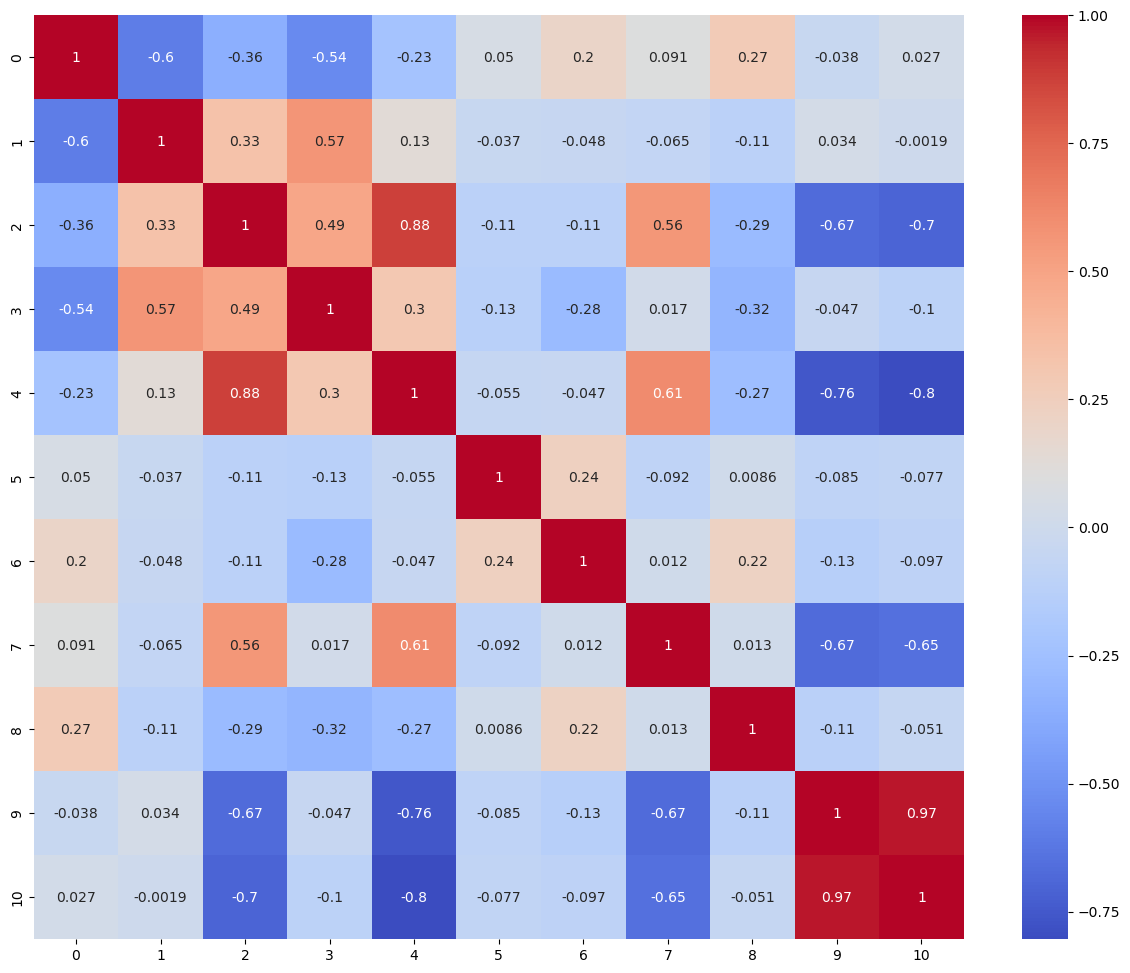

In [105]:
# Drawing Correlation
correlation = df_std.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

### Splitting Data to Training and Testing Sets

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df_std, y, test_size=0.2, random_state=42)

### Linear Regression
Linear Regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the data. It aims to minimize the sum of squared differences between observed and predicted values, assuming linearity, independence, homoscedasticity, and normality. It is commonly used to predict outcomes, such as car prices, by analyzing how different features (e.g., engine size, fuel type) affect the target variable.


### Decision Tree Regressor
The Decision Tree Regressor is a tree-based model that splits the dataset into subsets based on feature values, creating a tree structure. Each leaf represents a prediction, while branches signify decisions. It's intuitive and can capture non-linear relationships but may overfit the data, requiring pruning or other regularization techniques.

### Random Forest Regressor
Random Forest Regressor is an ensemble learning method that combines multiple decision trees (trained on random subsets of the data and features) to improve prediction accuracy. It reduces overfitting and increases robustness but may be computationally expensive for large datasets.

### Gradient Boosting Regressor
Gradient Boosting Regressor is another ensemble technique that builds sequential decision trees, where each tree corrects the errors of the previous one. It is highly effective for complex, non-linear relationships and offers flexibility through hyperparameter tuning. However, it is computationally intensive and sensitive to overfitting if not properly tuned.

### Support Vector Regressor (SVR)
SVR uses the principles of Support Vector Machines to find a hyperplane that best fits the data within a margin of tolerance. It is powerful for small- to medium-sized datasets with non-linear relationships, especially when paired with kernels. However, it may struggle with large datasets and requires careful parameter selection for optimal performance.

## Building a Models

In [111]:
#Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

In [113]:
#Train and evaluate models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    results[name] = {
        "R² Score": r2,
        "MAE": mae,
        "RMSE": rmse
    }

### Model Evaluation Result

In [115]:
# Display Results
results_df = pd.DataFrame(results).T
print(results_df)

                             R² Score       MAE      RMSE
Linear Regression            0.825697  0.161574  0.201772
Decision Tree Regressor      0.744972  0.170912  0.244063
Random Forest Regressor      0.876245  0.136639  0.170016
Gradient Boosting Regressor  0.891191  0.133739  0.159419
Support Vector Regressor     0.790854  0.177862  0.221020


In [119]:
#Visualization
#Function to plot actual vs predicted prices
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f'Actual vs Predicted Prices: {model_name}')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.grid(True)
    plt.show()

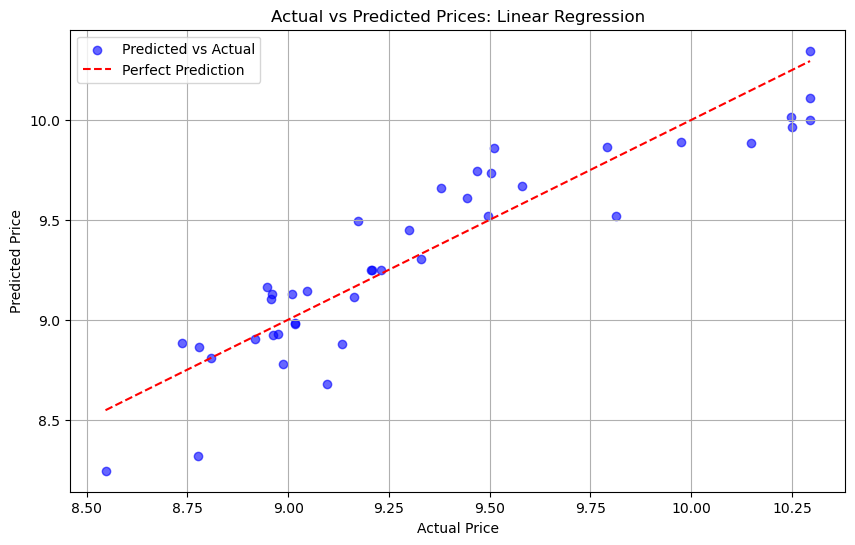

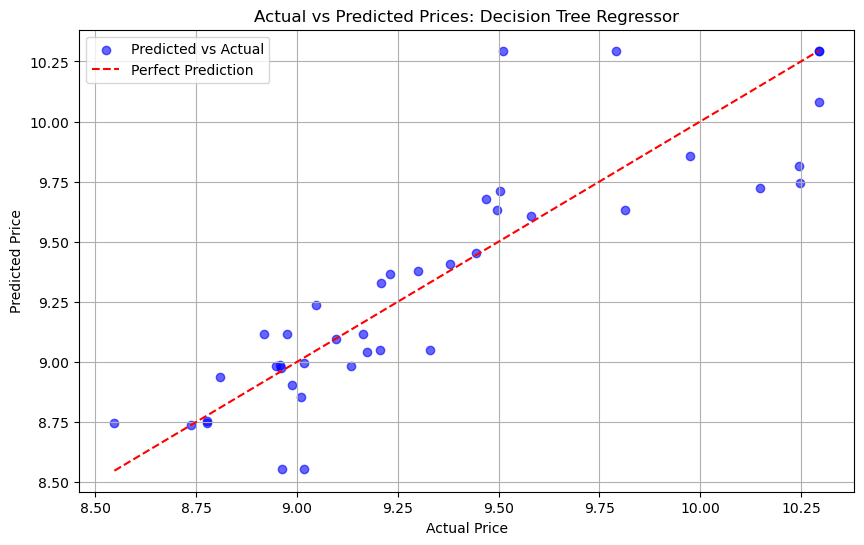

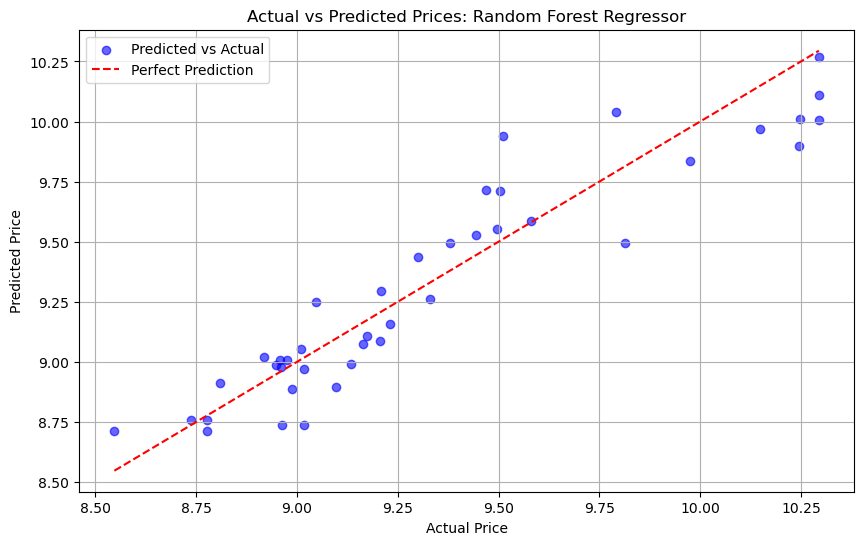

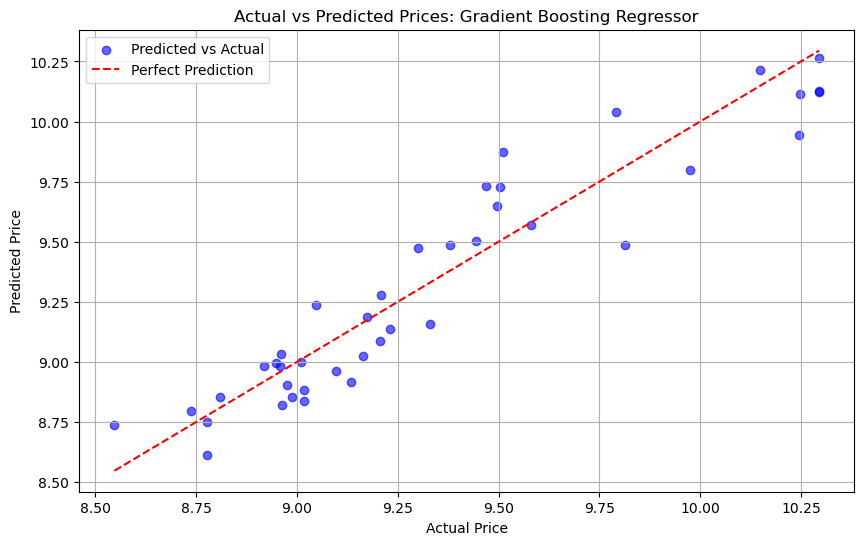

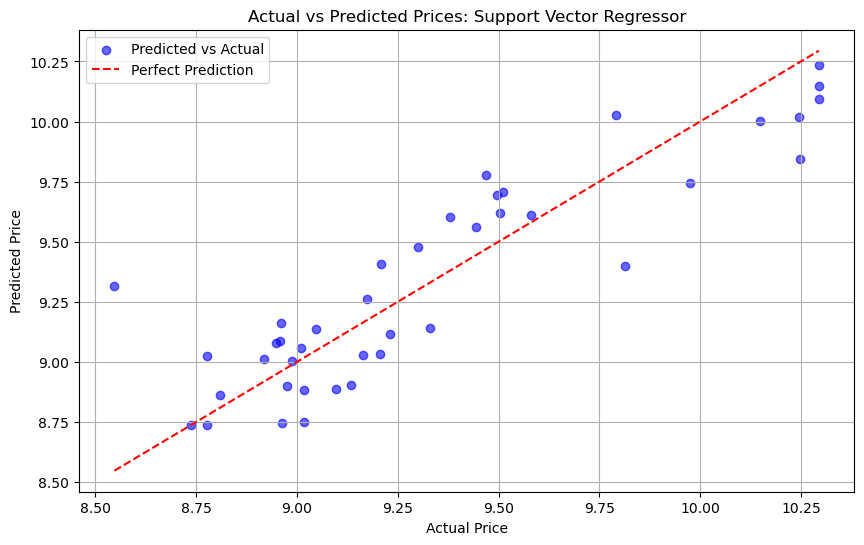

In [123]:
#Iterate through models to plot predictions
for name, model in models.items():
# Generate predictions for the test set
    y_pred = model.predict(X_test)
    
# Call the plotting function
    plot_actual_vs_predicted(y_test, y_pred, name)

In [125]:
# Find The Best Model Based on R² Score
best_model_name = results_df['R² Score'].idxmax()
best_model_metrics = results_df.loc[best_model_name]

print(f"Best Model: {best_model_name}")
print("\nPerformance Metrics:")
print(best_model_metrics)

Best Model: Gradient Boosting Regressor

Performance Metrics:
R² Score    0.891191
MAE         0.133739
RMSE        0.159419
Name: Gradient Boosting Regressor, dtype: float64


In [127]:
#Rank Models by R² Score
ranked_models = results_df.sort_values(by='R² Score', ascending=False)
print("Ranked Models by R² Score:")
print(ranked_models)

Ranked Models by R² Score:
                             R² Score       MAE      RMSE
Gradient Boosting Regressor  0.891191  0.133739  0.159419
Random Forest Regressor      0.876245  0.136639  0.170016
Linear Regression            0.825697  0.161574  0.201772
Support Vector Regressor     0.790854  0.177862  0.221020
Decision Tree Regressor      0.744972  0.170912  0.244063


### Hyperparameter Tuning

In [129]:
#Define the Model
gbr = GradientBoostingRegressor(random_state=42)

#Define Hyperparameters to Tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

#Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           scoring='r2', cv=5, verbose=2, n_jobs=-1)

#Fit the Model
grid_search.fit(X_train, y_train)

#Best Parameters and Performance
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.6}
Best R² Score: 0.8970872363382394


In [131]:
#Use the Best Estimator for Predictions
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test)

#Evaluate on the Test Set
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nTest Set Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Test Set Performance:
R² Score: 0.9089
MAE: 0.12
RMSE: 0.15


### Saving the Model

In [133]:
# Save the model to a file
joblib.dump(best_gbr, 'car_price_prediction_gb_model.joblib')
print("Model saved as 'car_price_prediction_gb_model.joblib'")

Model saved as 'car_price_prediction_gb_model.joblib'


### Conclusion:
The Gradient Boosting Regressor model offers valuable insights into the factors driving car prices, enabling the business to make informed decisions. It helps in designing cars that align with specific price targets and formulating pricing strategies based on key features that impact pricing. This project showcases a systematic approach to solving regression problems and underscores the power of machine learning in providing actionable business insights.